# Figures for Chapter on SAR

In [12]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from pathlib import Path
pad = Path(os.getcwd())
if pad.name != "Python":
    pad_correct = Path("../../Python")
    os.chdir(pad_correct)
from functions.plotting_functions import plot_discrete_raster
write_fig = True

## Landuse and SAR 2D image

In [6]:
s1_xr = xr.open_dataset('data/s0_OpenEO/S0_zwalm_landuse.nc', decode_coords= 'all')
s1_xr = s1_xr.chunk({'t':20})
s1_xr['VV_db'] = 10 * np.log10(s1_xr['VV'])
s1_xr

<xarray.Dataset>
Dimensions:         (t: 747, x: 1219, y: 1571)
Coordinates:
  * t               (t) datetime64[ns] 2015-06-10 2015-06-13 ... 2022-11-03
  * x               (x) float64 5.469e+05 5.469e+05 ... 5.591e+05 5.591e+05
  * y               (y) float64 5.639e+06 5.639e+06 ... 5.624e+06 5.624e+06
    crs             |S1 ...
    spatial_ref     int32 ...
    band            int32 ...
Data variables:
    VV              (t, y, x) float32 dask.array<chunksize=(20, 1571, 1219), meta=np.ndarray>
    angle           (t, y, x) float32 dask.array<chunksize=(20, 1571, 1219), meta=np.ndarray>
    Orbitdirection  (t) object dask.array<chunksize=(20,), meta=np.ndarray>
    landuse         (y, x) float32 dask.array<chunksize=(1571, 1219), meta=np.ndarray>
    VV_db           (t, y, x) float32 dask.array<chunksize=(20, 1571, 1219), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.6.5a1
    description:  
    title:

In [7]:
colormap = colors.ListedColormap(
            [
                "#000000",
                "#387b00",
                "#64cf1b",
                 "#a47158",
                "#00bfff",
            ]
        )
labels = [
    'Urban',
    'Forest',
    'Pasture',
    'Agriculture',
    'Water'
]

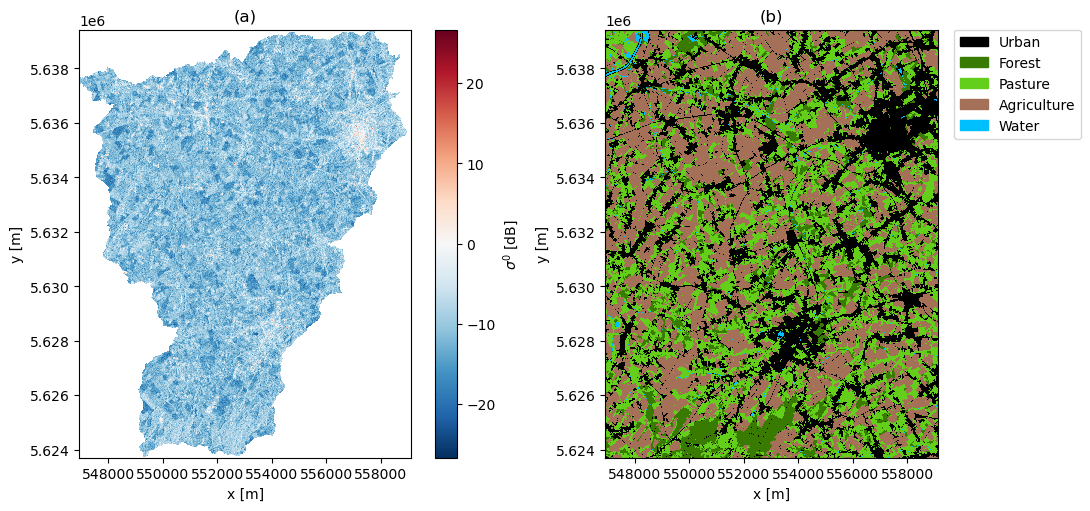

In [8]:
fig, axes = plt.subplots(1,2, figsize = (11.5,5),constrained_layout = True)
s1_xr['VV_db'].isel(t=0).plot(ax = axes[0],  cbar_kwargs = {'label':r'$\sigma^0$ [dB]'}, rasterized = True)
axes[0].set_aspect('equal','box')
axes[0].set_title('(a)')
axes[0].set_xlabel('x [m]')
axes[0].set_ylabel('y [m]')
# s1_xr['landuse'].plot(ax = axes[1])
# axes[1].set_aspect('equal','box')
fig, ax_1 = plot_discrete_raster(
    fig, axes[1], s1_xr['landuse'].values, bounds = list(s1_xr.rio.bounds()), 
    labels = labels, cmap = colormap, rasterized = True
)
ax_1.set_aspect('equal','box')
ax_1.set_xlabel('x [m]')
ax_1.set_ylabel('y [m]')
ax_1.set_title('(b)')
figures_SAR_path = Path("Figures/Figures_chapter_SAR")
if not os.path.exists(figures_SAR_path):
    os.makedirs(figures_SAR_path)
if write_fig:
    fig.savefig(figures_SAR_path/'sigma0_landuse_example.pdf',format = 'pdf')

In [9]:
s1_xr.isel(t=0)['t'].values

numpy.datetime64('2015-06-10T00:00:00.000000000')

In [10]:
list(s1_xr.rio.bounds())

[546930.0, 5623710.0, 559120.0, 5639420.0]

## Timeseries

In [13]:
s1_pd = pd.read_csv('data/s0_OpenEO/s1_timeseries.csv',index_col ='t', parse_dates=True)
s1_pd.head()

,VVUrban,VVForest,VVPasture,VVAgriculture,VVWater,Orbitdirection,VV_avg,crs,spatial_ref,band,LAIUrban,LAIForest,LAIPasture,LAIAgriculture
t,,,,,,,,,,,,,,
2015-06-10,-6.354673,-8.703481,-10.873600,-10.908742,-9.507541,descending,-9.016964,b'',0,1,1.960757,4.404207,2.528486,1.948304
2015-06-13,-5.168030,-7.980120,-10.070904,-10.264377,-8.838981,ascending,-8.068564,b'',0,1,1.959216,4.402250,2.528594,2.013756
2015-06-25,-5.044620,-7.442512,-9.898238,-9.213866,-8.590348,ascending,-7.676430,b'',0,1,2.013869,4.438301,2.688440,2.514134
2015-07-04,-2.802677,-4.667004,-7.369689,-5.949702,-5.765600,descending,-5.049990,b'',0,1,2.060767,4.498016,2.838013,2.634088
2015-07-16,-6.162562,-7.858552,-10.387653,-9.031004,-8.936791,descending,-8.251430,b'',0,1,1.929216,4.306390,2.615205,2.435994


In [25]:
s1_pd_ascending = s1_pd[s1_pd['Orbitdirection'] == 'ascending']
s1_pd_descending = s1_pd[s1_pd['Orbitdirection'] == 'descending']
cols = s1_pd.columns
VV_cols = cols[0:5]
names_legend = [name[2:] for name in VV_cols]
print(names_legend)

['Urban', 'Forest', 'Pasture', 'Agriculture', 'Water']


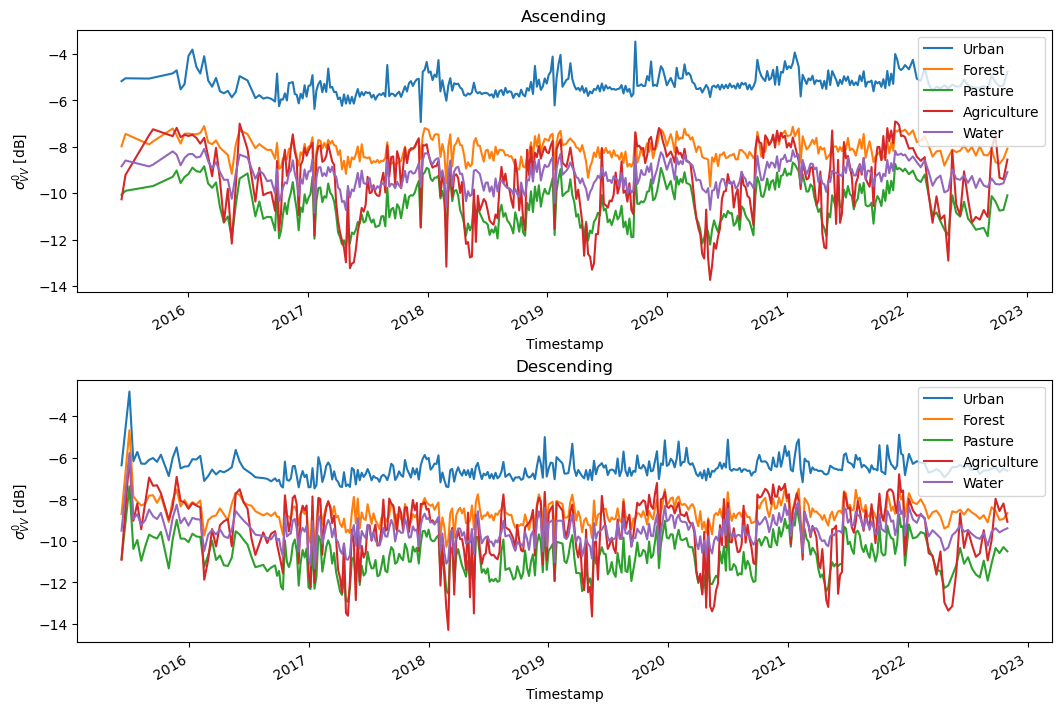

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10.5,7),constrained_layout = True)

#ascending
s1_pd_ascending[VV_cols].plot.line(ax = ax1)
ax1.set_title('Ascending')
ax1.set_ylabel(r'$\sigma^0_{VV}$ [dB]')
ax1.legend(names_legend, loc = 'upper right')
ax1.set_xlabel('Timestamp')

#descending
s1_pd_descending[VV_cols].plot.line(ax = ax2)
ax2.set_ylabel(r'$\sigma^0_{VV}$ [dB]')
ax2.set_title('Descending')
ax2.legend(names_legend, loc = 'upper right')
ax2.set_xlabel('Timestamp')
if write_fig:
    fig.savefig(figures_SAR_path/'sigma0_timeseries.pdf',format = 'pdf')